# CATBOOST

In [ ]:
%%javascript
// TABLE OF CONTENT SCRIPT: https://github.com/pkiage/tool-ipython_notebook_goodies
$.getScript('https://pkiage.github.io/tool-ipython_notebook_goodies/ipython_notebook_toc.js')

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Data

## Load Data

In [2]:
import pandas as pd
import catboost
from catboost import datasets
from catboost import *

In [3]:
import numpy as np # Numba needs NumPy 1.21 or less
print(np.__version__)
np.set_printoptions(precision=4)

1.21.5


In [4]:
train_df, test_df = catboost.datasets.amazon()

## Prepare Data

In [5]:
# Label value extraction
y = train_df.ACTION
X = train_df.drop('ACTION', axis=1)

In [6]:
# Categorical features declaration
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


### How many negative objects are present in the train dataset X?

In [7]:
y.unique()

array([1, 0], dtype=int64)

In [8]:
zero_count = (y == 0).sum()

In [9]:
print(f'Negative objects present in the train dataset: {zero_count}')

Negative objects present in the train dataset: 1897


In [10]:
## How many positive objects are present in the train dataset X?

In [11]:
one_count = (y==1).sum()

In [12]:
print(f'Positive objects present in the train dataset: {one_count}')

Positive objects present in the train dataset: 30872


### How many unique values have feature RESOURCE?

In [13]:
unique_vals_for_RESOURCE = len(X.RESOURCE.unique())

In [14]:
print(f'Unique values with feature RESOURCE: {unique_vals_for_RESOURCE}')

Unique values with feature RESOURCE: 7518


## Create pool object

In [15]:
import numpy as np
from catboost import Pool

pool1 = Pool(data=X, label=y, cat_features=cat_features)
pool2 = Pool(data='../data/external/amazon/train.csv', delimiter=',', has_header=True)
pool3 = Pool(data=X, cat_features=cat_features)

print('Dataset shape')
print('dataset 1:' + str(pool1.shape) + '\ndataset 2:' + str(pool2.shape)  + '\ndataset 3:' + str(pool3.shape))

print('\n')
print('Column names')
print('dataset 1: ')
print(pool1.get_feature_names()) 
print('\ndataset 2:')
print(pool2.get_feature_names())
print('\ndataset 3:')
print(pool3.get_feature_names())

Dataset shape
dataset 1:(32769, 9)
dataset 2:(32769, 9)
dataset 3:(32769, 9)


Column names
dataset 1: 
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 2:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 3:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


## Split your data into train and validation

When you will be training your model, you will have to detect overfitting and select best parameters. To do that you need to have a validation dataset.
Normally you would be using some random split, for example
`train_test_split` from `sklearn.model_selection`.
But for the purpose of this lab the train part will be the first 80% of the data and the evaluation part will be the last 20% of the data.

In [16]:
train_count = int(X.shape[0] * 0.8)

X_train = X.iloc[:train_count,:]
y_train = y[:train_count]
X_validation = X.iloc[train_count:, :]
y_validation = y[train_count:]

# Train Model

In [17]:
%%time
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    random_seed=0,
    learning_rate=0.1
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent'
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())
print()

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1, 'random_seed': 0}

CPU times: total: 1.38 s
Wall time: 784 ms


## Random seed

If you don't specify random_seed then random seed will be set to a new value each time.
After the training has finished you can look on the value of the random seed that was set.
If you train again with this random_seed, you will get the same results.

In [18]:
random_seed = model.random_seed_
print('Used random seed = ' + str(random_seed))
model = CatBoostClassifier(
    iterations=5,
    random_seed=random_seed
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Used random seed = 0
Learning rate set to 0.5
0:	learn: 0.3963217	test: 0.3986149	best: 0.3986149 (0)	total: 8.62ms	remaining: 34.5ms
1:	learn: 0.2934864	test: 0.2972563	best: 0.2972563 (1)	total: 30.2ms	remaining: 45.3ms
2:	learn: 0.2495301	test: 0.2543897	best: 0.2543897 (2)	total: 45.1ms	remaining: 30ms
3:	learn: 0.2235704	test: 0.2267986	best: 0.2267986 (3)	total: 137ms	remaining: 34.2ms
4:	learn: 0.2003235	test: 0.1962958	best: 0.1962958 (4)	total: 207ms	remaining: 0us

bestTest = 0.1962957582
bestIteration = 4



# Model Evaluation, Comparison, & Interpretation 

## Stdout of the training

You can see in stdout values of the loss function on each iteration, or on each k-th iteration.
You can also see how much time passed since the start of the training and how much time is left.

In [19]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
    verbose=3
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.441257
0:	learn: 0.4218644	test: 0.4238882	best: 0.4238882 (0)	total: 9.2ms	remaining: 129ms
3:	learn: 0.2323838	test: 0.2357560	best: 0.2357560 (3)	total: 202ms	remaining: 556ms
6:	learn: 0.1868476	test: 0.1795406	best: 0.1795406 (6)	total: 476ms	remaining: 543ms
9:	learn: 0.1786571	test: 0.1689628	best: 0.1689628 (9)	total: 731ms	remaining: 366ms
12:	learn: 0.1731382	test: 0.1639559	best: 0.1639559 (12)	total: 961ms	remaining: 148ms
14:	learn: 0.1720164	test: 0.1623020	best: 0.1623020 (14)	total: 1.08s	remaining: 0us

bestTest = 0.1623019855
bestIteration = 14



## What is the mean value of the Logloss metric on validation dataset (X_validation, y_validation)?

After 10 times training `CatBoostClassifier` with different random seeds in the following way:

```python
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    random_seed={my_random_seed}
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)
```

In [20]:
scores = np.zeros(10)
for i in range(10):
    model = CatBoostClassifier(
        iterations=300,
        learning_rate=0.1,
        random_seed=i,
    )
    model.fit(
        X_train, y_train,
        cat_features=cat_features,
        eval_set=(X_validation, y_validation),
        logging_level='Silent',
    )
    scores[i] = model.best_score_['validation']['Logloss']

In [21]:
print(np.mean(scores))
print(np.std(scores))

0.13764335147685836
0.0008832156284620633


In [22]:
print(np.mean(scores[4:]))
print(np.std(scores[4:]))

0.13785928442387926
0.0008658316844740658


### Selected mean

In [23]:
print(scores)
print(scores.mean())

[0.1378 0.1384 0.1367 0.1364 0.1374 0.1372 0.1369 0.1388 0.1375 0.1393]
0.13764335147685836


In [24]:
scores_selected = [0.1377092, 0.1390896, 0.1371881, 0.1371346]
print(np.mean(scores_selected))
print(np.std(scores_selected))

0.137780375
0.0007885034888160002


In [25]:
logloss_mean = np.mean(scores_selected)

In [26]:
print(f'Logloss mean: {logloss_mean}')

Logloss mean: 0.137780375


### Standard deviation

In [27]:
print(f'Standard deviation: {scores.std()}')

Standard deviation: 0.0008832156284620633


## Metrics Graph Plotting


When experimenting with Jupyter notebook you can see graphs of different errors during training. To do that you need to use plot=True parameter.

In [28]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.1,
    custom_loss=['Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### What is the value of the accuracy metric value on evaluation dataset?

After training with parameters iterations=50, random_seed=63, learning_rate=0.1?

In [29]:
accuracy = model.best_score_['validation']['Accuracy']
print(accuracy)

0.9440036618858713


## Model Comparison

In [30]:
model1 = CatBoostClassifier(
    learning_rate=0.5,
    iterations=1000,
    random_seed=64,
    train_dir='learning_rate_0.5',
    custom_loss = ['Accuracy']
)

model2 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=1000,
    random_seed=64,
    train_dir='learning_rate_0.05',
    custom_loss = ['Accuracy']
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=100
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=100
)

0:	learn: 0.3007996	test: 0.3044268	best: 0.3044268 (0)	total: 12ms	remaining: 12s
100:	learn: 0.1226510	test: 0.1468957	best: 0.1444052 (48)	total: 13.1s	remaining: 1m 56s
200:	learn: 0.0980788	test: 0.1542154	best: 0.1444052 (48)	total: 27.2s	remaining: 1m 47s
300:	learn: 0.0793208	test: 0.1626283	best: 0.1444052 (48)	total: 41s	remaining: 1m 35s
400:	learn: 0.0642928	test: 0.1695896	best: 0.1444052 (48)	total: 54.4s	remaining: 1m 21s
500:	learn: 0.0530183	test: 0.1761571	best: 0.1444052 (48)	total: 1m 8s	remaining: 1m 8s
600:	learn: 0.0442059	test: 0.1836908	best: 0.1444052 (48)	total: 1m 22s	remaining: 54.7s
700:	learn: 0.0383143	test: 0.1878972	best: 0.1444052 (48)	total: 1m 35s	remaining: 40.8s
800:	learn: 0.0331930	test: 0.1929329	best: 0.1444052 (48)	total: 1m 48s	remaining: 27.1s
900:	learn: 0.0320066	test: 0.1948283	best: 0.1444052 (48)	total: 2m	remaining: 13.3s
999:	learn: 0.0304523	test: 0.1961502	best: 0.1444052 (48)	total: 2m 13s	remaining: 0us

bestTest = 0.1444051519
b

In [31]:
from catboost import MetricVisualizer
MetricVisualizer(['learning_rate_0.05', 'learning_rate_0.5']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Which model will give best resulting accuracy on validation dataset?

By best resulting accuracy we mean accuracy on best iteration, which might be not the last iteration.

In [32]:
# model1 = 0.5
accuracy_model1 = model1.best_score_['validation']['Accuracy']

# model2 = 0.05
accuracy_model2 = model2.best_score_['validation']['Accuracy']

# differences
accuracy_diff_abs = abs(accuracy_model2-accuracy_model1)


In [33]:
if accuracy_model1 > accuracy_model2:
    print(f'Model 1 with learning rate 0.5 gives best accuracy of {accuracy_model1} (greater by {accuracy_diff_abs}).')
if accuracy_model1 < accuracy_model2:
    print(f'Model 2 with learning rate 0.05 gives best accuracy of {accuracy_model2} (greater by {accuracy_diff_abs}).')
if accuracy_model1 == accuracy_model2:
    print(f'Difference in best accuracy is {accuracy_diff_abs} therefore both models give equal best accuracy.')

Model 2 with learning rate 0.05 gives best accuracy of 0.958193469636863 (greater by 0.004577357339029642).


## Best iteration

If a validation dataset is present then after training, the model is shrinked to a number of trees when it got best evaluation metric value on validation dataset.
By default evaluation metric is the optimized metric. But you can set evaluation metric to some other metric.
In the example below evaluation metric is `Accuracy`.

In [34]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
    eval_metric='Accuracy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [35]:
print(f'Tree count: {str(model.tree_count_)}')

Tree count: 25


## What will be the number of trees in the resulting model? 

After training with validation dataset with parameters below:

`iterations=100`, ` learning_rate=0.5`, `eval_metric='Accuracy'` and with parameter `use_best_model=False`

In [36]:
# If you don't want the model to be shrinked, 
# you can set `use_best_model=False`

model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
    eval_metric='Accuracy',
    use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [37]:
print(f'Tree count: {str(model.tree_count_)}')

Tree count: 100


## Cross-validation

The next functionality you need to know about is cross-validation.
For unbalanced datasets stratified cross-validation can be useful.

In [38]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    inverted=False,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.1614486451
bestIteration = 31

Training on fold [1/5]

bestTest = 0.1554856763
bestIteration = 57

Training on fold [2/5]

bestTest = 0.1588065247
bestIteration = 46

Training on fold [3/5]

bestTest = 0.1525713791
bestIteration = 60

Training on fold [4/5]

bestTest = 0.1576264978
bestIteration = 29



In [39]:
# Cross-validation returns specified metric values 
# on every iteration (or every k-th iteration, if you specify so)

print(cv_data[0:4])

   iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0           0           0.305030          0.000080            0.305040   
1           1           0.227725          0.009408            0.228845   
2           2           0.189388          0.001005            0.196564   
3           3           0.179014          0.001998            0.187332   

   train-Logloss-std  test-AUC-mean  test-AUC-std  
0           0.000047       0.500000      0.000000  
1           0.008576       0.625090      0.104628  
2           0.002273       0.798176      0.013905  
3           0.002752       0.810401      0.008450  


In [40]:
# Let's look on mean value and standard deviation of 
# Logloss for cv on best iteration.
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.1579±0.0036 on step 57


### What will be mean of Logloss metric on test of the stratified cross-validation on the best iteration?

In [41]:
mean_on_best_iteration = cv_data['test-Logloss-mean'][best_iter]
best_iter

57

In [42]:
print(f'mean_logloss_cv = {mean_on_best_iteration}')

mean_logloss_cv = 0.15785031799599408


### What will be the standard deviation of Logloss metric of the stratified cross-validation on the best iteration?

In [43]:
std_on_mean_on_best_iteration = cv_data['test-Logloss-std'][best_iter]

In [44]:
print(f'logloss_std_1 = {std_on_mean_on_best_iteration}')

logloss_std_1 = 0.003592864811913075


## Overfit Detector

A useful feature of the library is overfitting detector.
Let's try training the model with early stopping.

###  What will be the number of iterations after which the training will stop?

Try training the model with the same parameters and with overfitting detector, but with `eval_metric='AUC'`

(Not the number of trees in the resulting model, but the number of iterations that the algorithm will perform befor training).

In [45]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    od_type='Iter',
    od_wait=20,
    eval_metric = 'AUC'
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [46]:
print('Best step: {}'.format(model_with_early_stop.best_iteration_))
print('Number of training log: {}'.format(len(model_with_early_stop.get_evals_result()['validation']['Logloss'])))

Best step: 36
Number of training log: 57


## Snapshotting - saving model training progress

If you train for long time, for example for several hours, you need to save snapshots.
Otherwise if your laptop or your server will reboot, you will loose all the progress.
To do that you need to specify `snapshot_file` parameter.
Try running the code below and interrupting the kernel after short time.
Then try running the same cell again.
The training will start from the iteration when the training was interrupted.
Note that all additional files are written by default into `catboost_info` directory. It can be changed using `train_dir` parameter. So the snapshot file will be there.

In [47]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=40,
    save_snapshot=True,
    snapshot_file='snapshot.bkp',
    random_seed=43
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level='Verbose'
)

Learning rate set to 0.288002

bestTest = 0.1589575705
bestIteration = 39



## Metric Evaluation on a New Dataset

You can calculate metrics directly after training

In [48]:
metrics = model.eval_metrics(data=pool1, metrics=['Logloss','AUC'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [49]:
print('AUC values:')
print(np.array(metrics['AUC']))

AUC values:
[0.5052 0.5074 0.639  0.6435 0.6435 0.6705 0.737  0.8662 0.9039 0.905
 0.9141 0.9216 0.923  0.9296 0.9336 0.9371 0.9412 0.9413 0.9421 0.9426
 0.9443 0.9456 0.9456 0.9456 0.9456 0.9455 0.9454 0.9452 0.9458 0.946
 0.9465 0.9469 0.9472 0.947  0.9468 0.9467 0.9467 0.9471 0.947  0.947 ]


### What will be the AUC value on 550 iteration if evaluation metrics on the initial X dataset?

Of model trained in the way below:

```python
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    random_seed=43
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level='Verbose'
)
```

In [50]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    random_seed=43,
    verbose=50
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level='Verbose'
)

0:	learn: 0.6335962	test: 0.6340206	best: 0.6340206 (0)	total: 78.3ms	remaining: 1m 18s
50:	learn: 0.1699053	test: 0.1576687	best: 0.1576687 (50)	total: 5.6s	remaining: 1m 44s
100:	learn: 0.1560669	test: 0.1425557	best: 0.1425557 (100)	total: 11.4s	remaining: 1m 41s
150:	learn: 0.1518864	test: 0.1402367	best: 0.1402367 (150)	total: 17.5s	remaining: 1m 38s
200:	learn: 0.1479863	test: 0.1394253	best: 0.1394253 (200)	total: 23.1s	remaining: 1m 31s
250:	learn: 0.1452415	test: 0.1389412	best: 0.1389412 (250)	total: 29.1s	remaining: 1m 26s
300:	learn: 0.1430100	test: 0.1383644	best: 0.1383027 (287)	total: 35.3s	remaining: 1m 22s
350:	learn: 0.1408898	test: 0.1380367	best: 0.1379945 (349)	total: 41.6s	remaining: 1m 17s
400:	learn: 0.1386075	test: 0.1376854	best: 0.1376854 (400)	total: 47.7s	remaining: 1m 11s
450:	learn: 0.1368001	test: 0.1375116	best: 0.1374614 (446)	total: 54.4s	remaining: 1m 6s
500:	learn: 0.1346932	test: 0.1372932	best: 0.1372932 (500)	total: 1m 2s	remaining: 1m 1s
550:	le

In [51]:
metrics = model.eval_metrics(data=pool1, metrics=['AUC', 'Logloss'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [52]:
print('AUC values:')
print(np.array(metrics['AUC'])[550])

AUC values:
0.9851424891363636


## Feature importances

Now we will learn how to understand which features are the most important ones. Let's first train the model that will not use feature combinations. To forbid feature combinations you need to use 'max_ctr_complexity=1'. This will speed up the training by a lot, but it will reduce the resulting quality. 

In [53]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=300,
    max_ctr_complexity=1,
    random_seed=43
)
model.fit(
    X, y,
    cat_features=cat_features,
    verbose=50
)

Learning rate set to 0.137885
0:	learn: 0.5379892	total: 85.9ms	remaining: 25.7s
50:	learn: 0.1642268	total: 4.71s	remaining: 23s
100:	learn: 0.1579621	total: 8.93s	remaining: 17.6s
150:	learn: 0.1533024	total: 13.2s	remaining: 13s
200:	learn: 0.1486749	total: 17.8s	remaining: 8.75s
250:	learn: 0.1446334	total: 22.2s	remaining: 4.34s
299:	learn: 0.1411890	total: 26.6s	remaining: 0us


In [54]:
# features importance without feature combinations

# importance when max_ctr_complexity=1
importances = model.get_feature_importance(prettified=True)
print(importances)

         Feature Id  Importances
0            MGR_ID    24.998707
1          RESOURCE    17.249072
2  ROLE_FAMILY_DESC    13.500640
3     ROLE_DEPTNAME    12.413156
4     ROLE_ROLLUP_2     8.766515
5        ROLE_TITLE     8.621941
6       ROLE_FAMILY     5.811611
7         ROLE_CODE     4.832646
8     ROLE_ROLLUP_1     3.805711


### What will be top 3 most important features for this model?
Try training the model without the restriction of combinations, with other parameters set to the same values.


In [55]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=300,
    max_ctr_complexity=4,
    random_seed=43
)
model.fit(
    X, y,
    cat_features=cat_features,
    verbose=50
)

Learning rate set to 0.137885
0:	learn: 0.5382281	total: 107ms	remaining: 31.9s
50:	learn: 0.1494065	total: 5.61s	remaining: 27.4s
100:	learn: 0.1423648	total: 12.3s	remaining: 24.3s
150:	learn: 0.1368037	total: 18.7s	remaining: 18.4s
200:	learn: 0.1324257	total: 25s	remaining: 12.3s
250:	learn: 0.1283281	total: 31.7s	remaining: 6.19s
299:	learn: 0.1251284	total: 38.7s	remaining: 0us


In [56]:
# importance when max_ctr_complexity=4

importances = model.get_feature_importance(prettified=True)
print(importances)

         Feature Id  Importances
0          RESOURCE    20.963067
1            MGR_ID    17.835245
2     ROLE_DEPTNAME    15.684628
3  ROLE_FAMILY_DESC    11.586115
4     ROLE_ROLLUP_2    10.996416
5        ROLE_TITLE     6.214463
6     ROLE_ROLLUP_1     6.100384
7         ROLE_CODE     5.484116
8       ROLE_FAMILY     5.135566


In [87]:
print('Top 3 features: \n\n{}'.format(importances.nlargest(3, 'Importances')))

Top 3 features: 

      Feature Id  Importances
0       RESOURCE    20.963067
1         MGR_ID    17.835245
2  ROLE_DEPTNAME    15.684628


## Shap Values

In [58]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=300,
    max_ctr_complexity=1,
    random_seed=43
)
model.fit(
    X, y,
    cat_features=cat_features,
    verbose=50
)

Learning rate set to 0.137885
0:	learn: 0.5379892	total: 103ms	remaining: 30.7s
50:	learn: 0.1642268	total: 4.95s	remaining: 24.2s
100:	learn: 0.1579621	total: 9.51s	remaining: 18.7s
150:	learn: 0.1533024	total: 14s	remaining: 13.8s
200:	learn: 0.1486749	total: 19.2s	remaining: 9.45s
250:	learn: 0.1446334	total: 23.9s	remaining: 4.67s
299:	learn: 0.1411890	total: 28.4s	remaining: 0us


The library provides a way to understand which features are important for a given object.
Let's take a look on the whole dataset X and analyze the influence of different features on the objects from this dataset.
We will now calculate importances for each object. After that we will visualize these importances.

In [59]:
pool1 = Pool(data=X, label=y, cat_features=cat_features)
shap_values = model.get_feature_importance(data=pool1, fstr_type='ShapValues', verbose=10000)
print(shap_values.shape)

Processing trees...
128/300 trees processed	passed time: 78.8ms	remaining time: 106ms
300/300 trees processed	passed time: 203ms	remaining time: 0us
Processing documents...
128/32769 documents processed	passed time: 4.38ms	remaining time: 1.12s
10112/32769 documents processed	passed time: 568ms	remaining time: 1.27s
20096/32769 documents processed	passed time: 963ms	remaining time: 607ms
30080/32769 documents processed	passed time: 1.45s	remaining time: 130ms
(32769, 10)


Let's look on the prediction of the model for 0-th object. The raw prediction is not the probability, to calculate probability from raw prediction you need to calculate sigmoid(raw_prediction).

In [60]:
X.iloc[0:1]

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908


In [92]:
test_objects = [X.iloc[0:1]]

for obj in test_objects:
    
    print(f'Probability of class 1 = {model.predict_proba(obj)[0][1]:.4f}')
    print('Formula raw prediction = {:.4f}'.format(model.predict(obj, prediction_type='RawFormulaVal')[0]))
    print('\n')

Probability of class 1 = 0.9948
Formula raw prediction = 5.2546




Sum of all shap values are equal to the resulting raw formula predition.
We can see on the graph that will be output below that there is a base value, which is equal for all the objects.
And almost all the feature have positive influence on this object. The biggest step to the right is because of the feature called 'MGR_ID'.

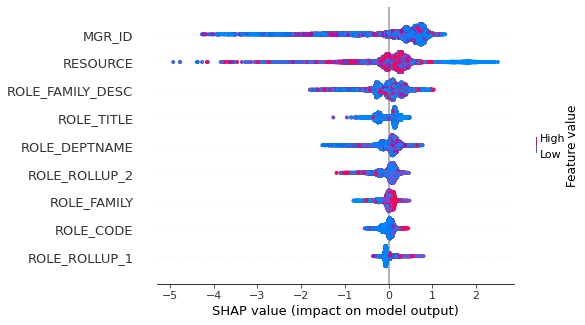

In [62]:
import shap
shap.initjs()
# shap.force_plot(shap_values[0,:], X.iloc[0,:])
shap.summary_plot(shap_values[:,:-1], X)

### What is the most important feature for the 91th object?

In [63]:
index_object = 91
print(shap_values[index_object])
print(shap_values[index_object][:-1].argmax())
print(shap_values[index_object][:-1].argmin())

[-3.8091 -0.7912 -0.1014 -0.5767 -0.0547 -0.2947 -0.4452 -0.0455 -0.3223
  3.5586]
7
0


In [64]:
print(X.columns)
print(X.columns[4])
print(X.columns[0])

Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE'],
      dtype='object')
ROLE_DEPTNAME
RESOURCE


In [125]:
feature_shape_values = shap_values[index_object:index_object+1,:-1]

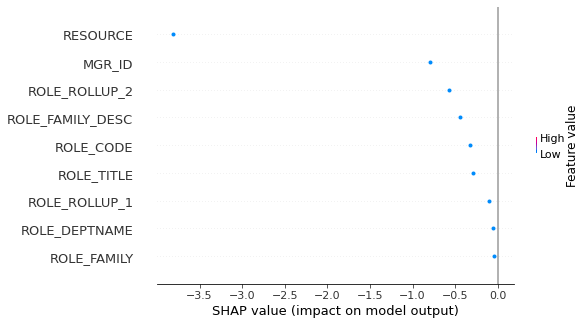

In [126]:
import shap
shap.initjs()
# shap.force_plot(shap_values[0,:], X.iloc[0,:])
shap.summary_plot(feature_shape_values, X.iloc[index_object:index_object+1])

In [127]:
most_important_feature = 'RESOURCE' # as seen in graph above

feature_names = X.iloc[index_object:index_object+1].columns

In [128]:
max_feature_shap_value = max(feature_shape_values[0])

In [129]:
min_feature_shap_value = min(feature_shape_values[0])

In [152]:
def find_feature_name_given_shap_value(values,value):
    where_value = np.where(values == value)
    index_of_value = where_value[1][0]
    feature_name = feature_names[index_of_value]
    return feature_name

In [158]:
min_feature = find_feature_name_given_shap_value(feature_shape_values,min_feature_shap_value)
max_feature = find_feature_name_given_shap_value(feature_shape_values,max_feature_shap_value)

In [162]:
if abs(max_feature_shap_value) > abs(min_feature_shap_value):
    most_important_feature = max_feature
    most_important_feature_value = max_feature_shap_value
if abs(max_feature_shap_value) < abs(min_feature_shap_value):
    most_important_feature = min_feature
    most_important_feature_value = min_feature_shap_value
if abs(max_feature_shap_value) == abs(min_feature_shap_value):
    most_important_feature = [max_feature, min_feature]
    most_important_feature_value = [max_feature_shap_value,min_feature_shap_value]

In [164]:
print(f'Most important feature is {most_important_feature} with value {most_important_feature_value:.3f}')

Most important feature is RESOURCE with value -3.809


#### Does it have positive or negative influence?

In [165]:
# Negative influence
if most_important_feature_value > 0:
    influence = -1
    print("Negative influence")
if most_important_feature_value < 0:
    influence = 1
    print("Positive influence")

Positive influence


You can also view aggregated information about the influences on the whole dataset.

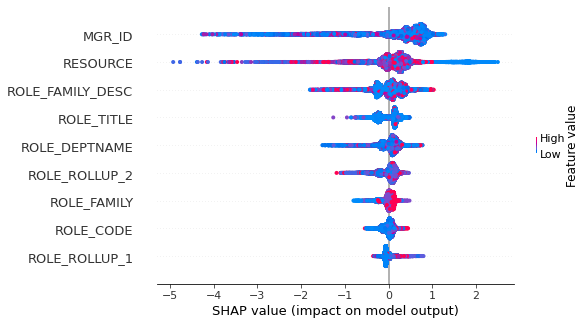

In [93]:
shap.summary_plot(shap_values[:, :influence], X)

From this graph you can see that values of MGR_ID and RESOURCE features have a large negative impact for many objects.
You can also see that RESOURCE has largest positive impact for many objects.

# Model Predictions

There are multiple ways to do predictions.
The easiest one is to call predict or predict_proba.
You also can make predictions using C++ code. For that see [documentation](https://tech.yandex.com/catboost/doc/dg/concepts/c-plus-plus-api-docpage/).

In [70]:
print(model.predict_proba(X=X_validation))

[[6.1666e-03 9.9383e-01]
 [7.6256e-04 9.9924e-01]
 [1.0311e-02 9.8969e-01]
 ...
 [1.1092e-02 9.8891e-01]
 [5.9473e-02 9.4053e-01]
 [2.2399e-02 9.7760e-01]]


In [71]:
print(model.predict(data=X_validation))

[1 1 1 ... 1 1 1]


For binary classification resulting value is not necessary a value in `[0,1]`. It is some numeric value. To get the probability out of this value you need to calculate sigmoid of that value.

In [72]:
raw_pred = model.predict(data=X_validation, prediction_type='RawFormulaVal')
print(raw_pred)

[5.0824 7.1781 4.5642 ... 4.4904 2.7609 3.7761]


In [73]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
probabilities = [sigmoid(x) for x in raw_pred]
print(np.array(probabilities))

[0.9938 0.9992 0.9897 ... 0.9889 0.9405 0.9776]


## Staged Prediction

CatBoost also supports staged prediction - when you want to have a prediction on each object on each iteration (or on each k-th iteration). This can be used if you want to calculate the values of some custom metric using the predictions.

In [74]:
predictions_gen = model.staged_predict_proba(data=X_validation, ntree_start=0, ntree_end=5, eval_period=1)
for iteration, predictions in enumerate(predictions_gen):
    print('Iteration ' + str(iteration) + ', predictions:')
    print(predictions)

Iteration 0, predictions:
[[0.4176 0.5824]
 [0.4115 0.5885]
 [0.3954 0.6046]
 ...
 [0.3957 0.6043]
 [0.4293 0.5707]
 [0.4115 0.5885]]
Iteration 1, predictions:
[[0.3438 0.6562]
 [0.3382 0.6618]
 [0.3111 0.6889]
 ...
 [0.3237 0.6763]
 [0.3547 0.6453]
 [0.3382 0.6618]]
Iteration 2, predictions:
[[0.2825 0.7175]
 [0.2775 0.7225]
 [0.2534 0.7466]
 ...
 [0.2645 0.7355]
 [0.2924 0.7076]
 [0.2775 0.7225]]
Iteration 3, predictions:
[[0.2354 0.7646]
 [0.2309 0.7691]
 [0.2097 0.7903]
 ...
 [0.2195 0.7805]
 [0.2442 0.7558]
 [0.2309 0.7691]]
Iteration 4, predictions:
[[0.1993 0.8007]
 [0.1955 0.8045]
 [0.1766 0.8234]
 ...
 [0.1852 0.8148]
 [0.2071 0.7929]
 [0.1953 0.8047]]


# Hyperparameter tuning

You can tune the parameters to get better speed or better quality.
Here is the list of parameters that are important for speed and accuracy.

## Training speed

Here is the list of parameters that are important for speeding up the training.
Note that changing this parameters might decrease the quality.
1. iterations + learning rate
By default we train for 1000 iterations. You can decrease this number, but if you decrease the number of iterations you need to increase learning rate so that the process converges. We set learning rate by default dependent on number of iterations and on your dataset, so you might just use default learning rate. But if you want to tune it, you need to know - the more iterations you have, the less should be the learning rate.

2. boosting_type
By default we use Ordered boosting for smaller datasets where we want to fight overfitting. This is expensive in terms of computations. You can set boosting_type to Plain to disable this.

3. bootstrap_type
By default we sample weights from exponential distribution. It is faster to use sampling from Bernoulli distribution. To enable that use bootstrap_type='Bernoulli' + subsample={some value < 1}

4. one_hot_max_size
By default we use one-hot encoding only for categorical features with little amount of different values. For all other categorical features we calculate statistics. This is expensive, and one-hot encoding is cheep. So you can speed up the training by setting one_hot_max_size to some bigger value

5. rsm
This parameter is very important, because it speeds up the training and does not affect the quality. So you should definitely use it, but only in case if you have hundreds of features.
If you have little amount of features it's better not to use this parameter.
If you have many features then the rule is the following: you decrease rsm, for example, you set rsm=0.1. With this rsm value the training needs more iterations to converge. Usually you need about 20% more iterations. But each iteration will be 10x faster. So the resulting training time will be faster even though you will have more trees in the resulting model.

6. leaf_estimation_iterations
This parameter is responsible for calculating leaf values after you have already selected tree structure.
If you have little amount of features, for example 8 or 10 features, then this place starts to be the bottle-neck.
Default value for this parameter depends on the training objective, you can try setting it to 1 or 5, and if you have little amount of features, this might speed up the training.

7. max_ctr_complexity
By default catboost generates categorical feature combinations in a greedy way.
This is time consuming, you can disable that by setting max_ctr_complexity=1 or by allowing only combinations of 2 features by setting max_ctr_complexity=2.
This will speed up the training only if you have categorical features.

8. If you are training the model on GPU, you can try decreasing border_count. This is the number of splits considered for each feature. By default it's set to 128, but you can try setting it to 32. In many cases it will not degrade the quality of the model and will speed up the training by a lot. 

In [75]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.5,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    border_count=32,
    custom_loss = ['AUC'])

fast_model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [76]:
print(fast_model.get_best_iteration())

47


## Default Settings

In [77]:
%%time
model_default = CatBoostClassifier(
    iterations=200,
    random_seed=0,
    train_dir='default',
    custom_loss = ['AUC']
)

model_default.fit(X_train, y_train,
                    eval_set=(X_validation, y_validation),
                    cat_features=cat_features,
                    logging_level='Silent',
                    plot=True
                )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: total: 52.4 s
Wall time: 24.1 s


In [78]:
print(model_default.get_best_iteration())

129


### What is the maximum speedup you could get by changing parameters?

Condition
- Without decreasing of AUC on best iteration on eval dataset compared to AUC on best iteration after training with default parameters and random seed = 0

The answer shoud be a number, for example 2.7 means you got 2.7 times speedup.

## Accuracy

The parameters listed below are important to get the best quality of the model. Try changing this parameters to improve the quality of the resulting model


In [166]:
%%time
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton',
    depth=6,
    custom_loss = ['AUC']
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    logging_level='Silent',
    eval_set=(X_validation, y_validation),
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: total: 8min 12s
Wall time: 3min 8s


### What is the maximum AUC value you can reached?

Try tunning these parameters to make AUC on eval dataset as large as possible.

# Saving the Model

You can save your model as a binary file. It is also possible to save the model as Python or C++ code.
If you save the model as a binary file you can then look on the parameters with which the model was trained, including learning_rate and random_seed that are set automatically if you don't specify them.

In [79]:
my_best_model = CatBoostClassifier(iterations=10)
my_best_model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
my_best_model.save_model('catboost_model.bin')

In [80]:
my_best_model.load_model('catboost_model.bin')
print(my_best_model.get_params())
print(my_best_model.random_seed_)
print(my_best_model.learning_rate_)

{'iterations': 10, 'loss_function': 'Logloss', 'verbose': 0}
0
0.5
